# session 1

In [1]:
#-------------Q1----------------
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.19.2


In [59]:
#-------------Q2----------------
help(np.add)

Help on ufunc object:

add = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array o

In [62]:
#-------------Q3----------------
l=np.array([[3],[4],[5],[0]])
def non_zero(m):
    return np.any(m)
non_zero(l)

True

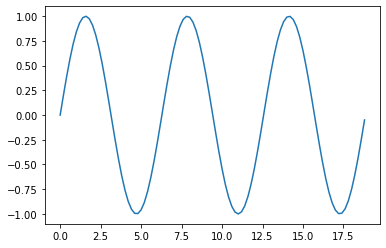

In [63]:
#-------------Q4----------------
x = np.arange( 0,6* np.pi, 0.2)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [95]:
#-------------Q6----------------
l = np.array([1, 2, 8,5,10,20,30,7,6,10,13])
x=10
[i for i in l if i!=x]

[1, 2, 8, 5, 20, 30, 7, 6, 13]

In [94]:
#-------------Q7----------------
l = np.array([1, np.nan, 8,5,np.nan,10])
l[~(np.isnan(l))]

array([ 1.,  8.,  5., 10.])

# session 3&4

In [64]:
#-------------Q1----------------
matrix=np.array([[1,2],[3,4]])

def calc_det(matrix):
    return matrix[0][0]*matrix[1][1]-matrix[0][1]*matrix[1][0]

def calc_inter(matrix):
    a=matrix[0][0]
    matrix[0][0]=matrix[1][1]
    matrix[1][1]=a
    matrix[0][1]=matrix[0][1]*-1
    matrix[1][0]=matrix[1][0]*-1
    return matrix


def inverse(matrix):
    res=calc_det(matrix)
    inter_change=calc_inter(matrix)
    return inter_change*((1/res))

inverse(matrix)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [99]:
#-------------Q2----------------
T=np.array([[3,0,2],[2,0,-2],[0,1,1]])

def check_dimensions(a, b):
    return a.shape[0]==b.shape[0]

def check_squared(a):
    return a.shape[0]==a.shape[1]

def det(a):
    return np.linalg.det(a)

def minor_coef(a,i,j):
    c = a.copy()
    c = np.delete(c, i,axis=0)
    c=[np.delete(row, j,axis=0) for row in c]
    return ((c[0][0]*c[1][1])-(c[0][1]*c[1][0]))

def minors(a):
    m=a.copy()
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            m[i][j]=minor_coef(a,i,j)
    return m   

def cofactors(a):
    m=a.copy()
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if (i==j) or (i==0 and j==a.shape[0]-1) or (j==0 and i==a.shape[1]-1):
                m[i][j]=a[i][j]
            else:
                m[i][j]=-a[i][j]
                
    return m

def transpose(a):
    return a.T

def inverse(a):
    if check_squared(a):
        return (1/det(a))*transpose(cofactors(minors(a)))
        
    else:
        return False
    

inverse(T)

array([[ 0.2,  0.2,  0. ],
       [-0.2,  0.3,  1. ],
       [ 0.2, -0.3,  0. ]])